In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
# Import library
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Load data
df = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep='\t')

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

# **Data visualization**

### People

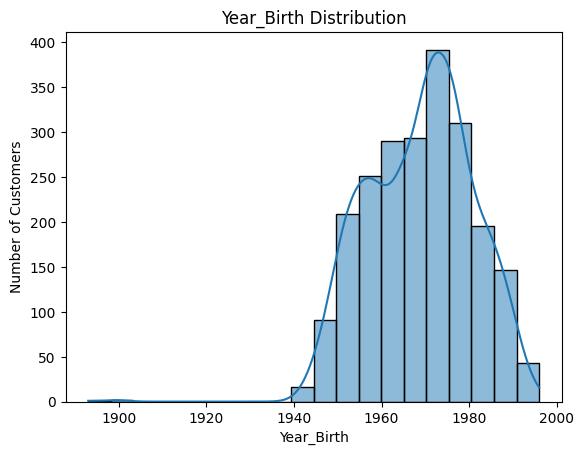

In [8]:
sns.histplot(df['Year_Birth'], bins=20, kde=True)
plt.title('Year_Birth Distribution')
plt.xlabel('Year_Birth')
plt.ylabel('Number of Customers')
plt.show()

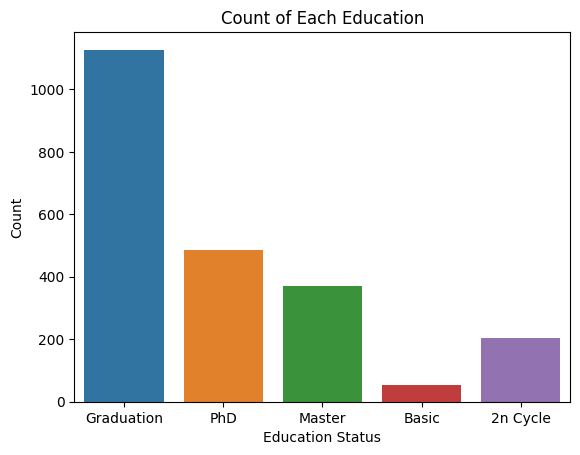

In [9]:
sns.countplot(x='Education', data=df)
plt.title('Count of Each Education')
plt.xlabel('Education Status')
plt.ylabel('Count')
plt.show()

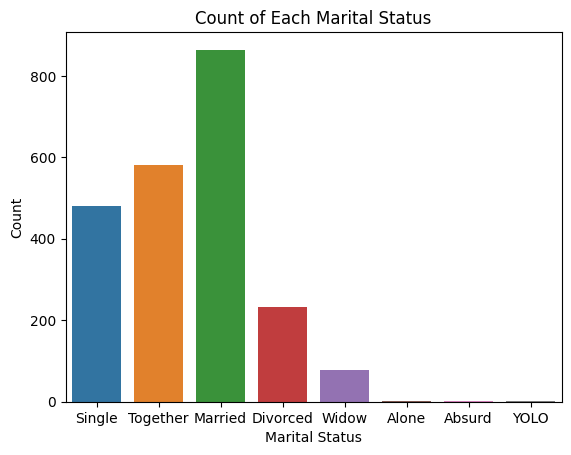

In [10]:
sns.countplot(x='Marital_Status', data=df)
plt.title('Count of Each Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

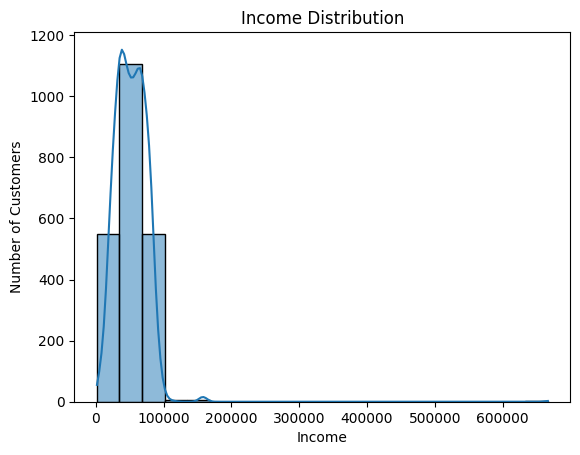

In [11]:
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.show()

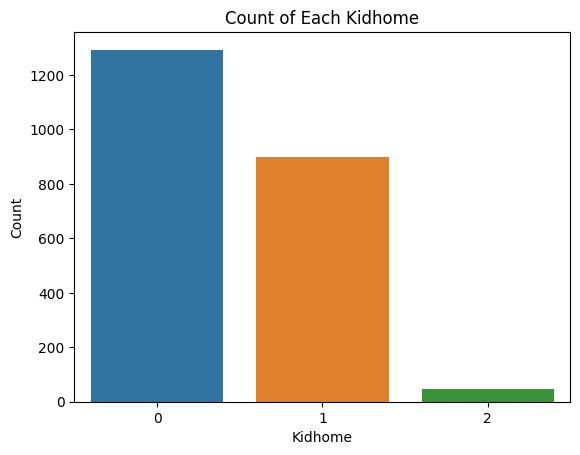

In [12]:
sns.countplot(x='Kidhome', data=df)
plt.title('Count of Each Kidhome')
plt.xlabel('Kidhome')
plt.ylabel('Count')
plt.show()

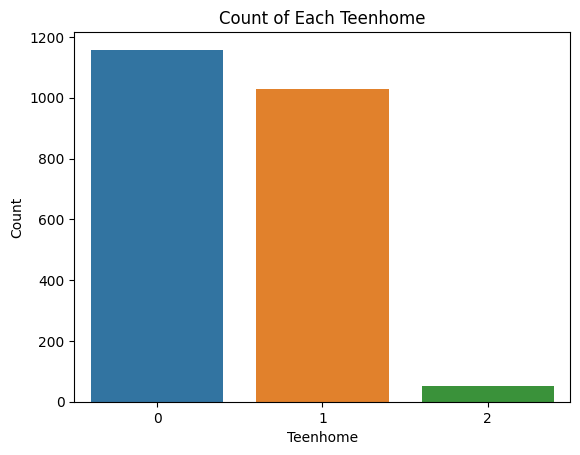

In [13]:
sns.countplot(x='Teenhome', data=df)
plt.title('Count of Each Teenhome')
plt.xlabel('Teenhome')
plt.ylabel('Count')
plt.show()

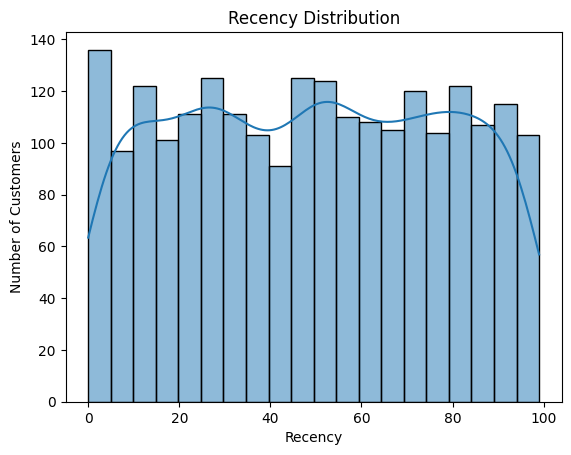

In [14]:
sns.histplot(df['Recency'], bins=20, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Number of Customers')
plt.show()

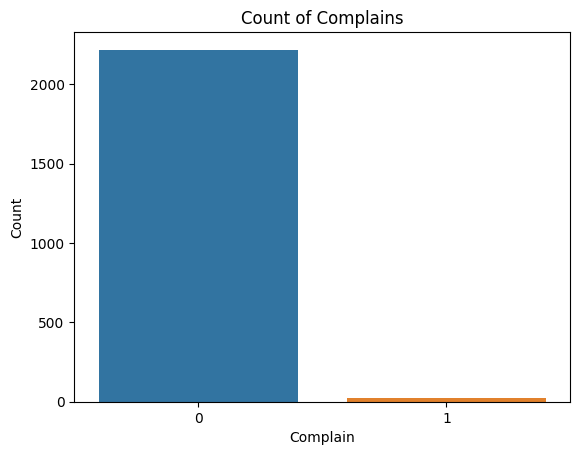

In [15]:
sns.countplot(x='Complain', data=df)
plt.title('Count of Complains')
plt.xlabel('Complain')
plt.ylabel('Count')
plt.show()

### Products

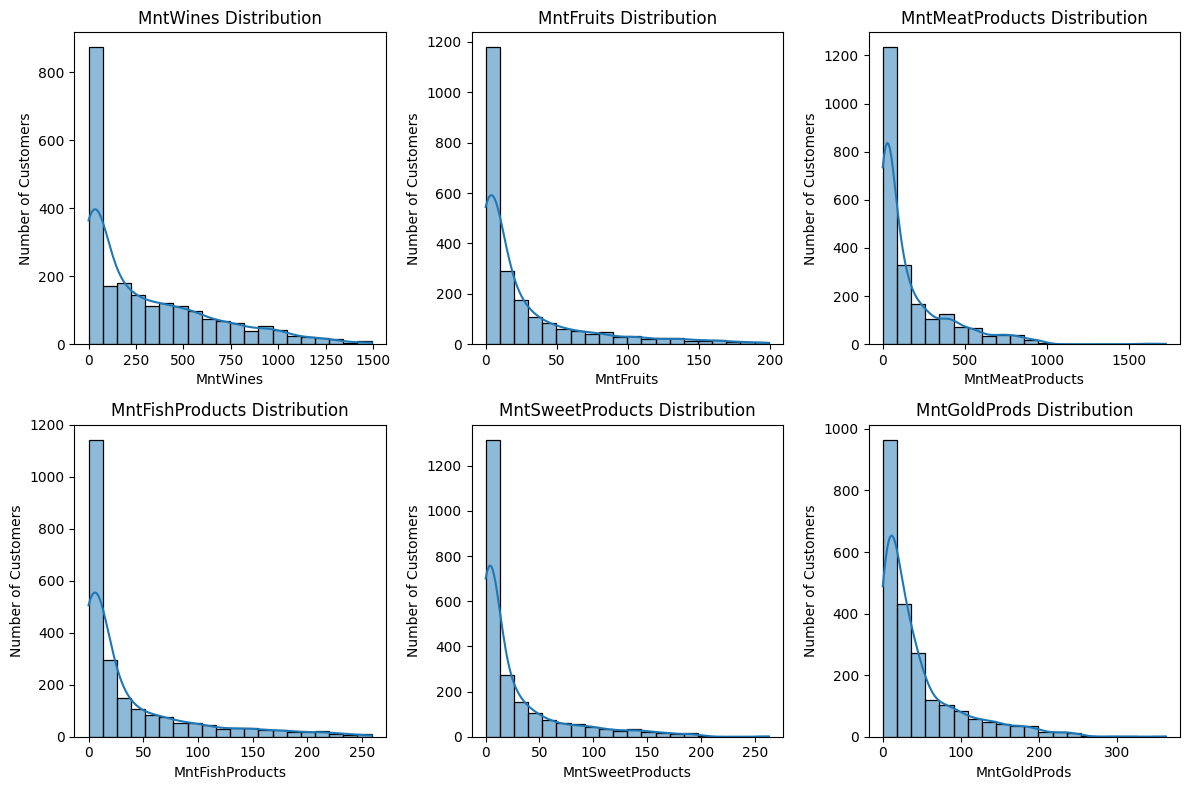

In [16]:
columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Number of Customers')


plt.tight_layout()
plt.show()

### Promotion

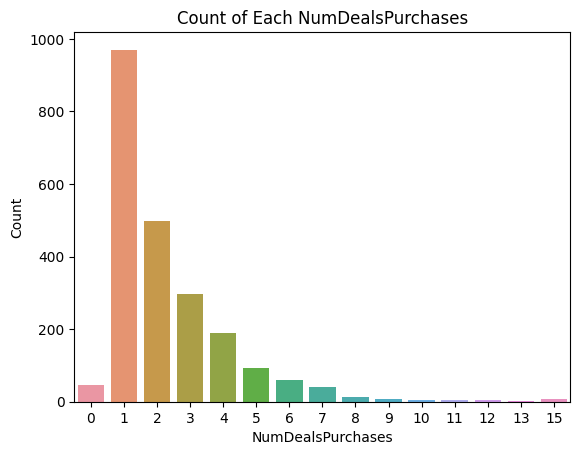

In [17]:
sns.countplot(x='NumDealsPurchases', data=df)
plt.title('Count of Each NumDealsPurchases')
plt.xlabel('NumDealsPurchases')
plt.ylabel('Count')
plt.show()

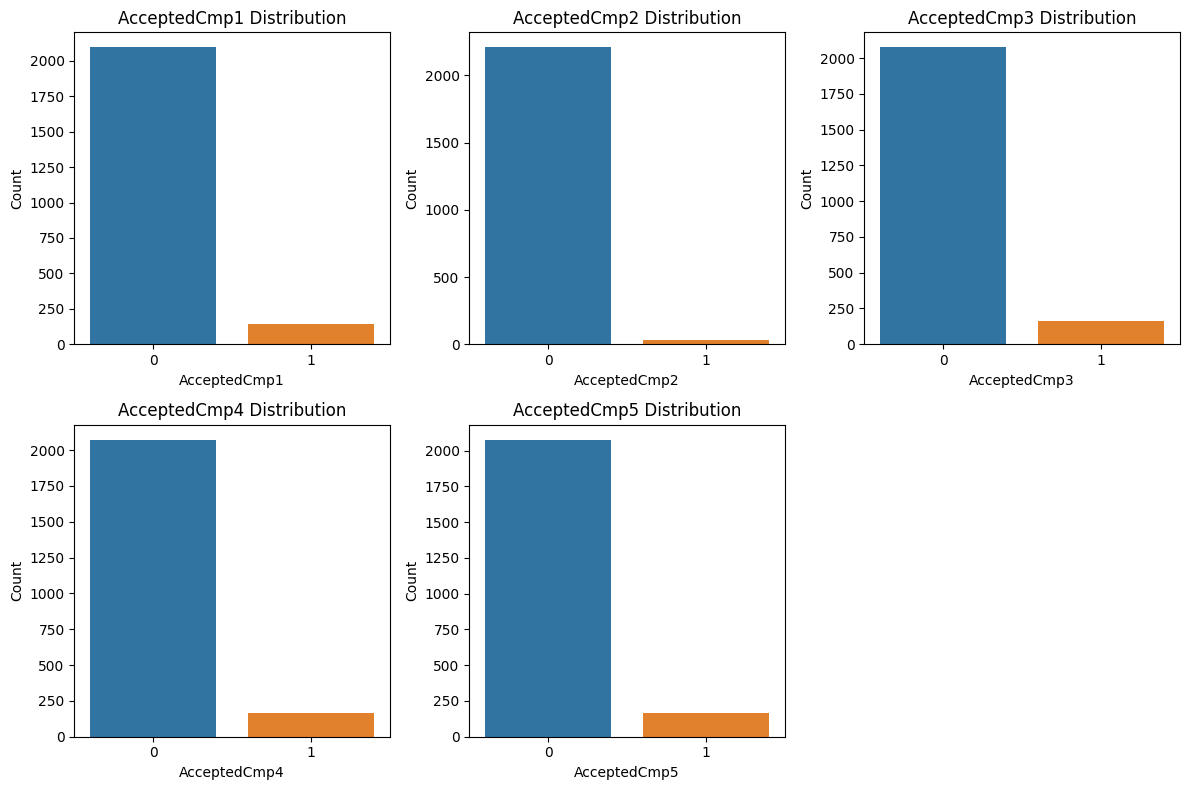

In [18]:
columns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'] 

plt.figure(figsize=(12,8))


for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i) 
    sns.countplot(x=df[column]) 
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')


plt.tight_layout()
plt.show()

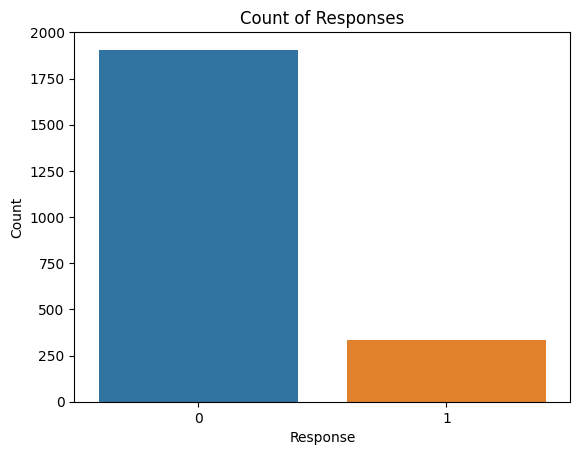

In [19]:
sns.countplot(x='Response', data=df)
plt.title('Count of Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

### Place

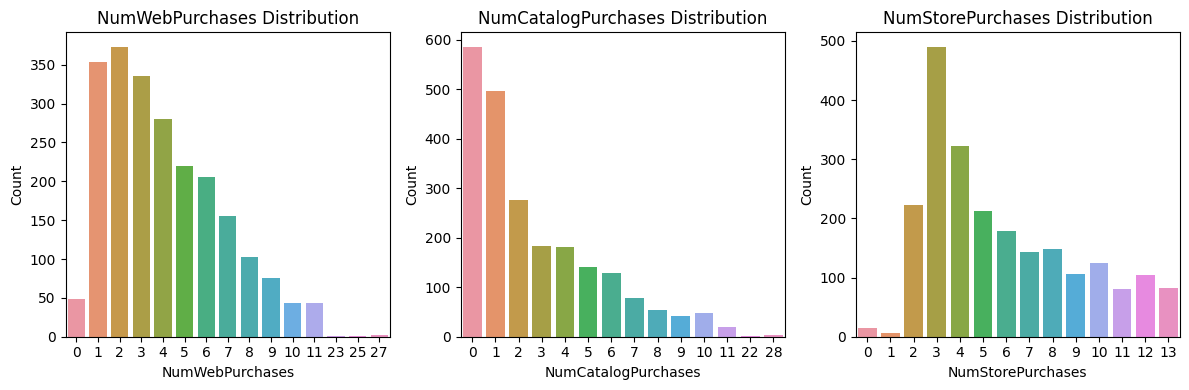

In [20]:
columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

plt.figure(figsize=(12, 4))


for i, column in enumerate(columns, 1):
    plt.subplot(1, 3, i) 
    sns.countplot(x=df[column]) 
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')


plt.tight_layout()
plt.show()


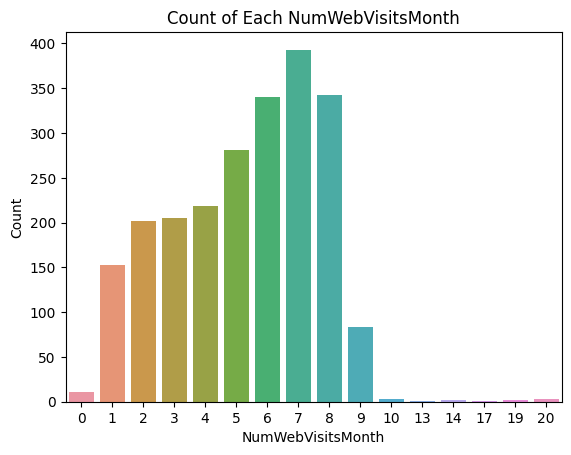

In [21]:
sns.countplot(x='NumWebVisitsMonth', data=df)
plt.title('Count of Each NumWebVisitsMonth')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Count')
plt.show()

# Data Cleaning

In [22]:
# Remove irrelevant or useless fields
df.drop(columns=['ID','Z_CostContact', 'Z_Revenue','Dt_Customer'], inplace=True)

In [23]:
df['Income'].fillna(df['Income'].median(), inplace=True)

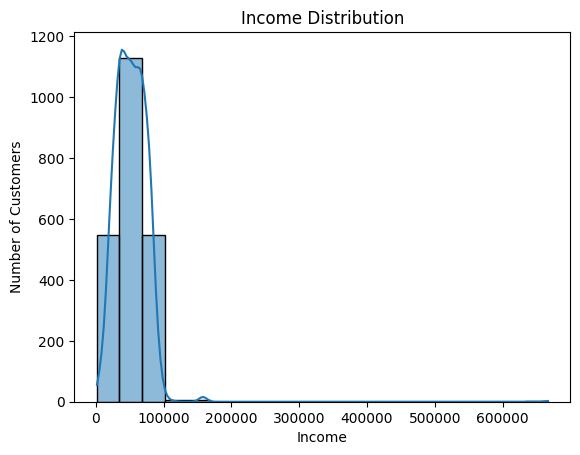

In [24]:
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.show()

<Axes: xlabel='Income'>

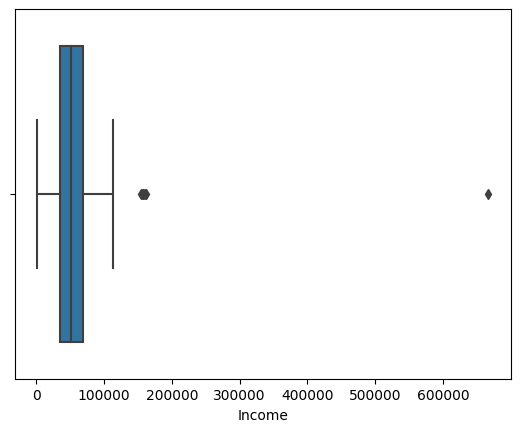

In [25]:
sns.boxplot(data=df,x="Income")

#### Filter for outliers

In [26]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + IQR*1.5
lower = Q1 - IQR*1.5
print(f'Upper: {upper}')
print(f'Lower: {lower}')

Upper: 117416.25
Lower: -13587.75


In [27]:
df = df[(df['Income']<upper) & (df['Income']>lower)]

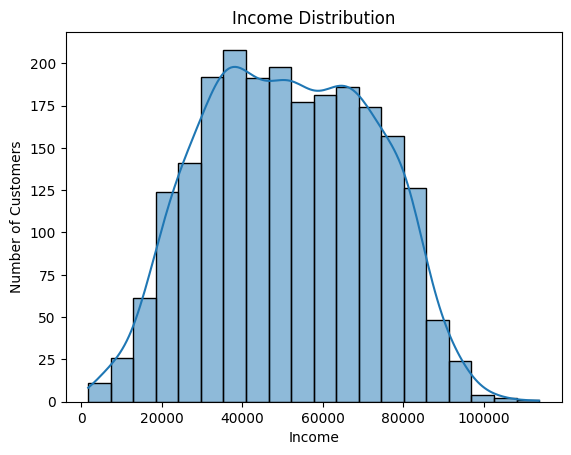

In [28]:
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.show()

# Clustering

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2232 non-null   int64  
 1   Education            2232 non-null   object 
 2   Marital_Status       2232 non-null   object 
 3   Income               2232 non-null   float64
 4   Kidhome              2232 non-null   int64  
 5   Teenhome             2232 non-null   int64  
 6   Recency              2232 non-null   int64  
 7   MntWines             2232 non-null   int64  
 8   MntFruits            2232 non-null   int64  
 9   MntMeatProducts      2232 non-null   int64  
 10  MntFishProducts      2232 non-null   int64  
 11  MntSweetProducts     2232 non-null   int64  
 12  MntGoldProds         2232 non-null   int64  
 13  NumDealsPurchases    2232 non-null   int64  
 14  NumWebPurchases      2232 non-null   int64  
 15  NumCatalogPurchases  2232 non-null   int64 

In [30]:
# Encode the 'Education' and 'Marital_Status' columns with numerical labels
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Education'] = encoder.fit_transform(df['Education'])
df['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2232 non-null   int64  
 1   Education            2232 non-null   int64  
 2   Marital_Status       2232 non-null   int64  
 3   Income               2232 non-null   float64
 4   Kidhome              2232 non-null   int64  
 5   Teenhome             2232 non-null   int64  
 6   Recency              2232 non-null   int64  
 7   MntWines             2232 non-null   int64  
 8   MntFruits            2232 non-null   int64  
 9   MntMeatProducts      2232 non-null   int64  
 10  MntFishProducts      2232 non-null   int64  
 11  MntSweetProducts     2232 non-null   int64  
 12  MntGoldProds         2232 non-null   int64  
 13  NumDealsPurchases    2232 non-null   int64  
 14  NumWebPurchases      2232 non-null   int64  
 15  NumCatalogPurchases  2232 non-null   int64 

In [32]:
# Standardize the data to have a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df) 

In [33]:
# Use PCA to reduce data to 3 dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f'k={k}, Silhouette Score: {score}')


k=2, Silhouette Score: 0.46926184553324113
k=3, Silhouette Score: 0.42002740508935205
k=4, Silhouette Score: 0.4319571749069009
k=5, Silhouette Score: 0.3529708295605322
k=6, Silhouette Score: 0.336912075272674
k=7, Silhouette Score: 0.3291195856892181
k=8, Silhouette Score: 0.3214252719540748
k=9, Silhouette Score: 0.3316578461310275


In [35]:
# Perform K-means clustering and assign cluster labels to the DataFrame
kmeans = KMeans(n_clusters=2, random_state=42) 
df['Cluster']= kmeans.fit_predict(X_pca)

In [36]:
df['Cluster']

0       1
1       0
2       1
3       0
4       0
       ..
2235    1
2236    0
2237    1
2238    1
2239    0
Name: Cluster, Length: 2232, dtype: int32

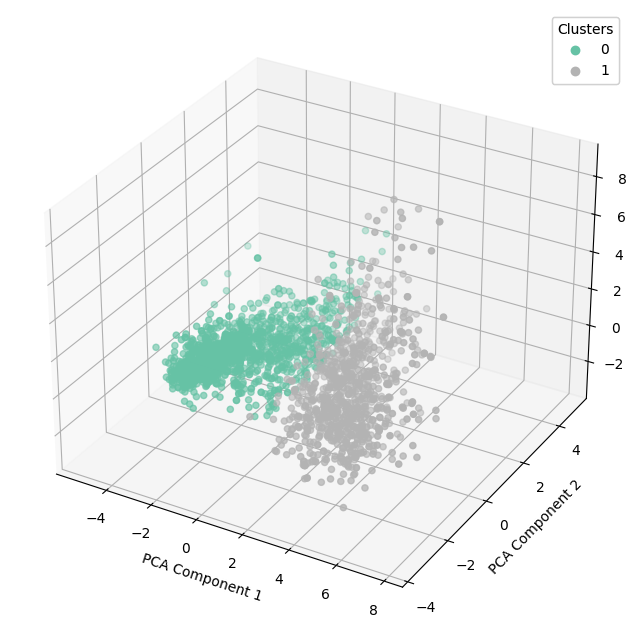

In [37]:
# Plot a 3D scatter plot of the PCA components with cluster coloring
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['Cluster'], cmap='Set2')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()